<a href="https://colab.research.google.com/github/yashverma27/ml_projects/blob/master/Bangaluru_price_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BANGALURU HOUSE PRICE PREDICTION**





In [1]:
#importing libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 

In [2]:
#reading data
df = pd.read_csv("Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
#rows and column of data
df.shape

(13320, 9)

In [4]:
#columns of dataset
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [5]:
#exploring area_type column
df['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [6]:
df['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [7]:
#getting data types of all columns
df.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

**Here one important things to notice is that "total_sqft" features is of object type. That's mean we have clean this feature .**

In [8]:
df2 = df.drop(['area_type','society','balcony','availability'],axis='columns')
df2.shape

(13320, 5)

**droping feature which are not required to build model**

In [9]:
#getting null value of each column
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

**since total null value are very less as compared to total size of data so we can drop these values**

In [10]:
df3=df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [12]:
#getting shape of dataset after removing null values
df3.shape

(13246, 5)

**Exploring the size feature**

In [11]:
#getting different unique values 
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

**Here we are seeing Strings 'BHK', 'Bedroom'. I think both of the strings are specifying the bedroom and the integer value denotes that how many bedroom each building contains. That's why let's split the each value of this feature take only the integer part.**

In [13]:

df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))
df3.bhk.unique()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

**droping the size column as we have created the another column 'bhk' which contains integer value of size column**

In [14]:
df3 = df3.drop(['size'], axis = 1)

In [15]:
df3.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2


**Exploring total_sqft feature**

In [16]:
#getting unique values
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

**we want our values to be in integer or float but we are seeing some range values**

In [17]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [18]:
df2[~df2['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000
56,Devanahalli,4 Bedroom,3010 - 3410,NaN,192.000
81,Hennur Road,4 Bedroom,2957 - 3450,NaN,224.500
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800
224,Devanahalli,3 BHK,1520 - 1740,NaN,74.820
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770


**for handeling the range values and convert it into float values we are using below function which takes average of range values and convert them into float**

In [20]:
def convert_sqt_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return(float(tokens[0]) + (float(tokens[1])))/2
    try:
        return float(x)
    except:
        return None

In [21]:
#creating a copy of df3
#converting total_sqft to float values
df4 = df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqt_to_num)
df4.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


In [24]:
df4.loc[30]

location      Yelahanka
total_sqft         2475
bath                  4
price               186
bhk                   4
Name: 30, dtype: object

**here we can see that location Yelahanka which is having range of (2100-2850) is converted to float by taking average to these values**

In [26]:
(2100+2850)/2

2475.0

**Adding price_per_sqft feature**

In [28]:
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [29]:
#df5 to csv file bhp.csv
df5.to_csv("bhp.csv",index=False)

In [27]:
len(df4['location'].unique())

1304

In [30]:

df5.location = df5.location.apply(lambda x: x.strip())
location_stats = df5['location'].value_counts(ascending=False)
location_stats

Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
Sunkan palya               1
Richmond Road              1
MRCR Layout                1
SARJAPUR BAGALUR ROAD      1
Seethappa Layout           1
Name: location, Length: 1293, dtype: int64


**Examine locations which is a categorical variable. We need to apply dimensionality reduction technique here to reduce number of locations**



In [31]:
#getting no. of locations which are having data points less than 10
len(location_stats[location_stats<= 10])

1052

# **DIMENSIONALITY REDUCTION**
Any location having less than 10 data points should be tagged as "other" location. This way number of categories can be reduced by huge amount. Later on when we do one hot encoding, it will help us with having fewer dummy columns

In [34]:
# locations and its data points
location_stats_less_then_10 = location_stats[location_stats<= 10]
location_stats_less_then_10

Nagadevanahalli          10
Gunjur Palya             10
Sadashiva Nagar          10
BTM 1st Stage            10
1st Block Koramangala    10
                         ..
Sunkan palya              1
Richmond Road             1
MRCR Layout               1
SARJAPUR BAGALUR ROAD     1
Seethappa Layout          1
Name: location, Length: 1052, dtype: int64

**So here we are seeing that 1052 location which has less the 10 data points. so let's make another category 'other' which contain this types of value**

In [35]:
df5.location = df5.location.apply(lambda x : 'other'  if x in location_stats_less_then_10 else x)
len(df5.location.unique())

242

In [37]:
df5.head(20)

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,1310.0,3.0,63.25,3,4828.244275
9,other,1020.0,6.0,370.00,6,36274.509804


# **Handeling** **Outliers**


In [38]:
x = df5.bhk.sum()
y = df5.total_sqft.sum()

In [39]:
y/x

553.1604444414506

From the above calculation we are seeing that average area needed to be there for per bedroom is around 553.16 squre foot.

Let's assume a threesold value of 100 sqft. And row containing less the 100 sqft for per bedroom will be consider as outlier and we are going to drop those those rows

In [42]:
df5[df5.total_sqft/df5.bhk < 100].head()

,location,total_sqft,bath,price,bhk,price_per_sqft
45,HSR Layout,600.0,9.0,200.0,8,33333.333333
349,other,11.0,3.0,74.0,3,672727.272727
770,other,600.0,9.0,190.0,9,31666.666667
857,Vijayanagar,600.0,4.0,72.0,8,12000.000000
992,Rajaji Nagar,315.0,4.0,90.0,4,28571.428571


Check above data points. We have 4 bhk apartment with 315 sqft. Another one is 8 bhk and total sqft is 600. These are clear data errors that can be removed safely

In [43]:
df6 = df5[~(df5.total_sqft/df5.bhk < 100)]

In [44]:
df6.shape

(13206, 6)

In [46]:
df6.price_per_sqft.describe()

count     13160.000000
mean       6666.830652
std        4508.228739
min         267.829813
25%        4262.948207
50%        5425.015738
75%        7285.438507
max      176470.588235
Name: price_per_sqft, dtype: float64

**Here we are seeing some extream high and low value. And by using the mean and standerd deviation  are going to take only those value which are only 1 standerd deviation away from the mean of each location.**

In [48]:
 def remove_pps_outliers(df):
        df_out = pd.DataFrame()
        for key, subdf in df.groupby('location'):
    
            m = np.mean(subdf.price_per_sqft)
            std = np.std(subdf.price_per_sqft)
            
            reduced_df = subdf[(subdf.price_per_sqft > (m-std)) & (subdf.price_per_sqft <= (m+std))]
            df_out = pd.concat([df_out,reduced_df],ignore_index = True)
            
        return df_out
        
df7 =  remove_pps_outliers(df6)
df7.shape

(10927, 6)

**Removing outliers from bath column**

In [50]:
df7.bath.unique()

array([ 4.,  3.,  6.,  2.,  5.,  8.,  1.,  7.,  9., 10., 12., 27., 11.,
       16., 13.])

In [51]:
df7[df7.bath>10]

,location,total_sqft,bath,price,bhk,price_per_sqft
5640,Neeladri Nagar,4000.0,12.0,160.0,10,4000.000000
8748,other,8000.0,27.0,230.0,27,2875.000000
8753,other,1200.0,11.0,170.0,11,14166.666667
8801,other,990.0,12.0,120.0,8,12121.212121
9007,other,12000.0,12.0,525.0,10,4375.000000
9102,other,10000.0,16.0,550.0,16,5500.000000
9907,other,6000.0,12.0,150.0,11,2500.000000
10269,other,5425.0,13.0,275.0,13,5069.124424


**It is unusual to have 2 more bathrooms than number of bedrooms in a home so this has to be handled**

Text(0, 0.5, 'Count')

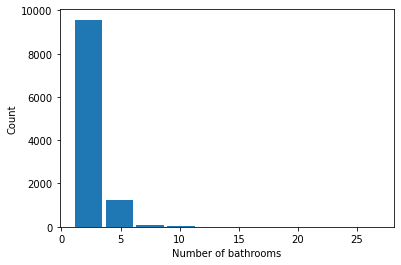

In [54]:
plt.hist(df7.bath,rwidth = .9)
plt.xlabel('Number of bathrooms')
plt.ylabel('Count')

In [55]:
df7[df7.bath>df7.bhk+2]

,location,total_sqft,bath,price,bhk,price_per_sqft
1634,Chamrajpet,1500.0,9.0,230.0,6,15333.333333
1770,Chikkabanavar,2460.0,7.0,80.0,4,3252.032520
5599,Nagasandra,7000.0,8.0,450.0,4,6428.571429
7139,Thanisandra,1806.0,6.0,116.0,3,6423.034330
8801,other,990.0,12.0,120.0,8,12121.212121
8925,other,11338.0,9.0,1000.0,6,8819.897689
10283,other,1200.0,9.0,122.0,6,10166.666667


**if you have 4 bedroom home and even if you have bathroom in all 4 rooms plus one guest bathroom, you will have total bath = total bed + 1 max. Anything above that is an outlier or a data error and can be removed**

In [56]:
df8 =  df7[df7.bath<df7.bhk + 2]
df8.shape

(10820, 6)

# **Use One Hot Encoding for Location**

In [57]:
dummies = pd.get_dummies(df8.location)

In [58]:
df8 = pd.concat([df8,dummies],axis = 'columns')

In [60]:
df8 = df8.drop(['price_per_sqft','location'], axis = 1)

In [61]:
X = df8.drop(['price'], axis=1)
y = df8.price

In [62]:
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,Amruthahalli,Anandapura,Ananth Nagar,Anekal,Anjanapura,Ardendale,Arekere,Attibele,BEML Layout,BTM 2nd Stage,BTM Layout,Babusapalaya,Badavala Nagar,Balagere,Banashankari,Banashankari Stage II,Banashankari Stage III,Banashankari Stage V,Banashankari Stage VI,Banaswadi,Banjara Layout,Bannerghatta,...,Sarakki Nagar,Sarjapur,Sarjapur Road,Sarjapura - Attibele Road,Sector 2 HSR Layout,Sector 7 HSR Layout,Seegehalli,Shampura,Shivaji Nagar,Singasandra,Somasundara Palya,Sompura,Sonnenahalli,Subramanyapura,Sultan Palaya,TC Palaya,Talaghattapura,Thanisandra,Thigalarapalya,Thubarahalli,Thyagaraja Nagar,Tindlu,Tumkur Road,Ulsoor,Uttarahalli,Varthur,Varthur Road,Vasanthapura,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,2850.0,4.0,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1200.0,6.0,6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1875.0,2.0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,930.0,4.0,7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [63]:
y.head()

0    428.0
1    194.0
2    125.0
3    235.0
4     85.0
Name: price, dtype: float64

In [64]:
#train test spliting of the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [65]:
#applying linear regression
from sklearn.linear_model import LinearRegression
lr =  LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test,y_test)

0.8309118366379501

# **CONCLUSION**

Accurcy of model the is 83.09% 